In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breastdataset/data.csv


## **Import the libraries**

In [2]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## **Loading the data**

In [3]:
data = pd.read_csv('/kaggle/input/breastdataset/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


 ## **Exploratory Data Analysis**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Drop empty column and ID
data = data.drop(columns=['Unnamed: 32', 'id'])

In [6]:
# Basic exploration
def explore_data(df):
    print("="*50)
    print("DATASET EXPLORATION")
    print("="*50)
    
    # Target distribution
    target_counts = df['diagnosis'].value_counts()
    print(f"\nTARGET DISTRIBUTION:")
    print(f"Benign (B): {target_counts[0]} cases")
    print(f"Malignant (M): {target_counts[1]} cases")
    print(f"Malignant rate: {target_counts[1]/len(df):.2%}")
    
    # Basic statistics
    print(f"\nDATASET SHAPE: {df.shape}")
    print(f"\nFEATURE TYPES:")
    print(df.dtypes.value_counts())
    
    # Statistical summary
    print(f"\nBASIC STATISTICS:")
    print(df.describe().T)

explore_data(data)

DATASET EXPLORATION

TARGET DISTRIBUTION:
Benign (B): 357 cases
Malignant (M): 212 cases
Malignant rate: 37.26%

DATASET SHAPE: (569, 31)

FEATURE TYPES:
float64    30
object      1
Name: count, dtype: int64

BASIC STATISTICS:
                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
rad

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

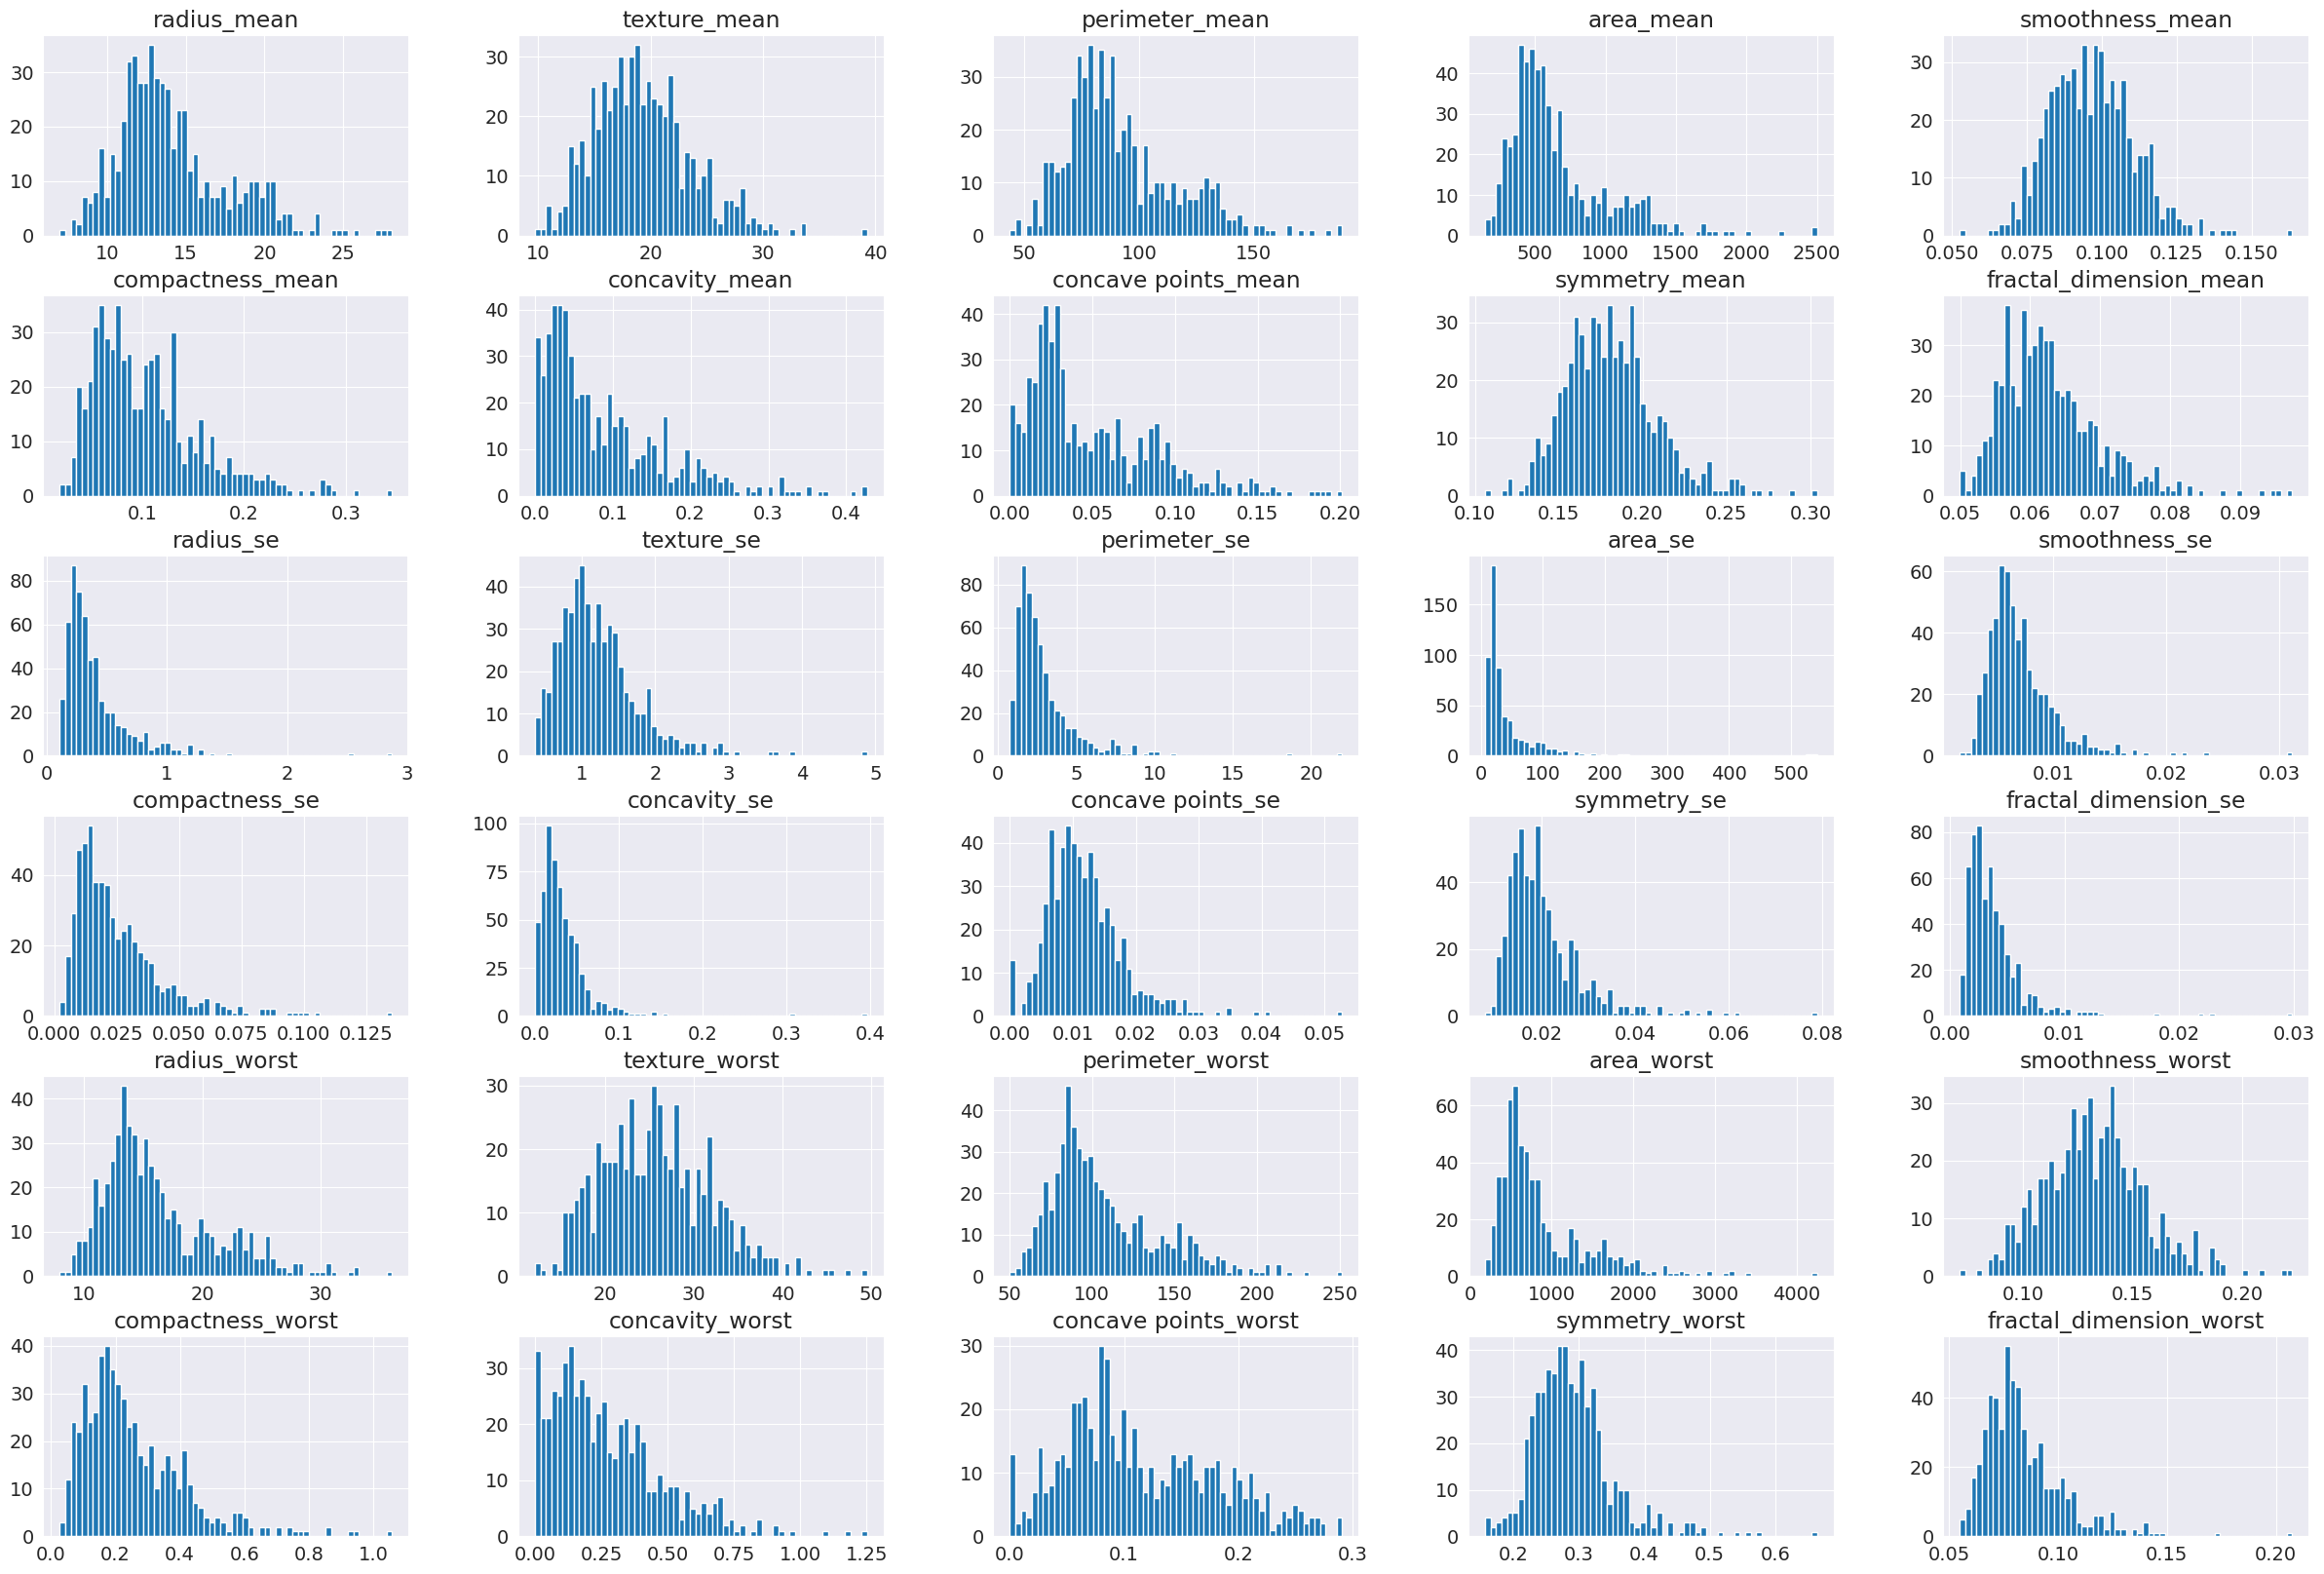

In [7]:
data.hist(bins=60,figsize=(30,20))

In [8]:
numerical_cols = [col for col in data.columns if data[col].dtype != 'O']

In [9]:
# Statistical summary of numerical features
print("NUMERICAL FEATURES - STATISTICAL SUMMARY")
print("="*80)

numerical_stats = data[numerical_cols].describe().T
numerical_stats['missing'] = data[numerical_cols].isnull().sum().values
numerical_stats['skewness'] = data[numerical_cols].skew().values
numerical_stats['kurtosis'] = data[numerical_cols].kurtosis().values

display(numerical_stats.style.background_gradient(cmap='coolwarm', subset=['mean', 'std', 'skewness', 'kurtosis']))

NUMERICAL FEATURES - STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max,missing,skewness,kurtosis
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000,0,0.942380,0.845522
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000,0,0.650450,0.758319
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000,0,0.990650,0.972214
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000,0,1.645732,3.652303
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400,0,0.456324,0.855975
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400,0,1.190123,1.650130
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800,0,1.401180,1.998638
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200,0,1.171180,1.066556
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000,0,0.725609,1.287933
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440,0,1.304489,3.005892


In [10]:
# Outlier detection using IQR method
print("OUTLIER DETECTION (IQR METHOD)")
print("="*80)

outlier_summary = []

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(data)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': outlier_pct
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Percentage', ascending=False)
display(outlier_df.style.background_gradient(cmap='Reds', subset=['Outlier_Count', 'Outlier_Percentage']))

print(f"\n Outlier Summary:")
print(f"   - Total features with outliers: {(outlier_df['Outlier_Count'] > 0).sum()}")
print(f"   - Average outlier percentage: {outlier_df['Outlier_Percentage'].mean():.2f}%")

OUTLIER DETECTION (IQR METHOD)


,Feature,Q1,Q3,IQR,Lower_Bound,Upper_Bound,Outlier_Count,Outlier_Percentage
13,area_se,17.850000,45.190000,27.340000,-23.160000,86.200000,65,11.423550
10,radius_se,0.232400,0.478900,0.246500,-0.137350,0.848650,38,6.678383
12,perimeter_se,1.606000,3.357000,1.751000,-1.020500,5.983500,38,6.678383
23,area_worst,515.300000,1084.000000,568.700000,-337.750000,1937.050000,35,6.151142
14,smoothness_se,0.005169,0.008146,0.002977,0.000703,0.012612,30,5.272408
15,compactness_se,0.013080,0.032450,0.019370,-0.015975,0.061505,28,4.920914
19,fractal_dimension_se,0.002248,0.004558,0.002310,-0.001217,0.008023,28,4.920914
18,symmetry_se,0.015160,0.023480,0.008320,0.002680,0.035960,27,4.745167
3,area_mean,420.300000,782.700000,362.400000,-123.300000,1326.300000,25,4.393673
29,fractal_dimension_worst,0.071460,0.092080,0.020620,0.040530,0.123010,24,4.217926



 Outlier Summary:
   - Total features with outliers: 29
   - Average outlier percentage: 3.56%


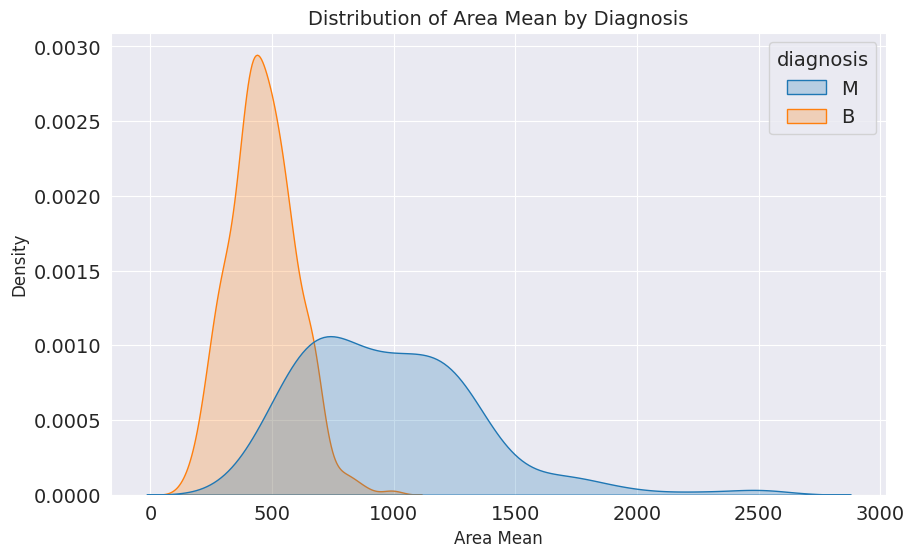

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='area_mean', hue='diagnosis',color='diagnosis', fill=True, common_norm=False)
plt.title("Distribution of Area Mean by Diagnosis", fontsize=14)
plt.xlabel("Area Mean", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

## **Training, Validation and Test Sets**

In [12]:
from sklearn.model_selection import train_test_split

# Split 80% train/validation and 20% test
train_val_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Then split the 80% train/validation into 60% train and 20% validation (0.25 of 0.8 = 0.2)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [13]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (341, 31)
val_df.shape : (114, 31)
test_df.shape : (114, 31)


## **Identify input and target columns**1

In [14]:
train_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
input_cols = list(train_df.columns[1:])
input_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [16]:
target_col = 'diagnosis'

In [17]:
# Training dataset inputs and target

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy() 

# Validation dataset inputs and target

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy() 

# Testing dataset inputs and target

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

## **Identify numeric and categorical columns**

In [18]:
numerical_cols = [col for col in train_inputs.columns if train_inputs[col].dtype != 'O']
numerical_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## **Preparing data for modelling**

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# --- Numerical Pipeline ---
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing numeric values
    ('scaler', StandardScaler())                    # Standardize features
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
])

# --- Fit and Transform ---
X_train = preprocessor.fit_transform(train_inputs)
X_val = preprocessor.transform(val_inputs)
X_test = preprocessor.transform(test_inputs)


all_feature_names = list(numerical_cols)

# Convert to DataFrames
X_train = pd.DataFrame(X_train, columns=all_feature_names)
X_val = pd.DataFrame(X_val, columns=all_feature_names)
X_test = pd.DataFrame(X_test, columns=all_feature_names)


In [20]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1.096070,-0.393222,-1.088443,-0.931696,-1.066928,-0.802738,-0.350766,-0.955168,0.511497,0.054015,-0.154064,1.395855,-0.038249,-0.372721,-0.731404,0.321767,0.834521,-0.162751,0.572854,0.304315,-0.960170,-0.166760,-0.918550,-0.801179,-1.551805,-0.696148,-0.356223,-1.161492,-0.077324,-0.310101
1,0.645426,-0.085449,0.744428,0.471022,0.739193,1.448132,1.383638,1.136530,0.198775,0.552591,-0.406281,-0.526396,-0.179945,-0.254830,-0.769031,0.511696,0.228082,0.050278,-0.798433,0.114064,0.501080,-0.062878,0.613697,0.284646,0.211535,1.412744,1.187868,0.916423,-0.230306,1.257169
2,1.149999,-2.087162,1.330946,1.038893,1.557006,3.258045,2.716141,2.619406,2.128411,2.156413,2.529097,-0.549355,2.886791,2.532512,-0.178571,1.260364,0.706665,0.633792,1.091181,0.869346,1.912725,-1.363078,2.330409,1.994825,1.310682,2.655517,2.230041,2.309861,2.627961,1.957190
3,-1.364791,-1.493090,-1.237586,-1.141857,4.675787,2.260177,0.149840,0.140608,1.982711,4.360148,0.030919,-0.190236,0.095436,-0.433891,0.909728,1.069909,0.104052,1.561549,0.551793,2.391711,-1.208189,-1.522252,-1.107477,-0.980332,2.508197,0.606534,-0.269582,-0.152081,0.188053,2.307200
4,-0.721245,-0.161796,-0.743654,-0.681821,-0.172184,-0.787129,-0.747606,-0.693608,0.049522,-0.460776,-0.023231,-0.668742,-0.069793,-0.279298,-0.184681,-0.759407,-0.609518,-0.399708,0.259283,-0.822886,-0.652212,-0.503539,-0.688862,-0.619083,-0.566849,-0.917935,-0.911169,-0.712177,-0.277138,-1.044567


## **Train a model**

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model_0 = RandomForestClassifier(random_state=42,
                                 n_jobs=-1,
                                 bootstrap=True,
                                 max_samples=0.5,
                                 class_weight='balanced',
                                 min_samples_leaf=3,
                                 min_samples_split=10,
                                 max_features=0.3,
                                 max_depth=16,
                                 criterion='entropy',
                                 n_estimators=200).fit(X_train, train_targets)



In [23]:
# Test the model on validation/Train data
train_accuracy = model_0.score(X_train, train_targets)
val_accuracy = model_0.score(X_val, val_targets)  

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Overfitting Gap: {train_accuracy - val_accuracy:.4f}")

Training Accuracy: 0.9853
Validation Accuracy: 0.9561
Overfitting Gap: 0.0292


In [24]:
from sklearn.model_selection import cross_validate

# Use cross-validation to get more reliable performance estimate
cv_results = cross_validate(
    model_0, X_train, train_targets, 
    cv=5, scoring='accuracy', return_train_score=True
)

print("=== CROSS-VALIDATION RESULTS ===")
print(f"Train CV scores: {cv_results['train_score']}")
print(f"Val CV scores: {cv_results['test_score']}")
print(f"Mean Train CV: {cv_results['train_score'].mean():.4f}")
print(f"Mean Val CV: {cv_results['test_score'].mean():.4f}")

=== CROSS-VALIDATION RESULTS ===
Train CV scores: [0.98161765 0.96703297 0.98534799 0.98168498 0.98534799]
Val CV scores: [0.95652174 0.97058824 0.92647059 0.98529412 0.94117647]
Mean Train CV: 0.9802
Mean Val CV: 0.9560


In [25]:
# Get probability predictions instead of class predictions
val_pred_proba = model_0.predict_proba(X_val)[:, 1]  # Probability of class 1

# Calculate ROC-AUC
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(val_targets, val_pred_proba)
print(f"RandomForestClassifier Model ROC-AUC score: {auc_score:.4f}")

RandomForestClassifier Model ROC-AUC score: 0.9792


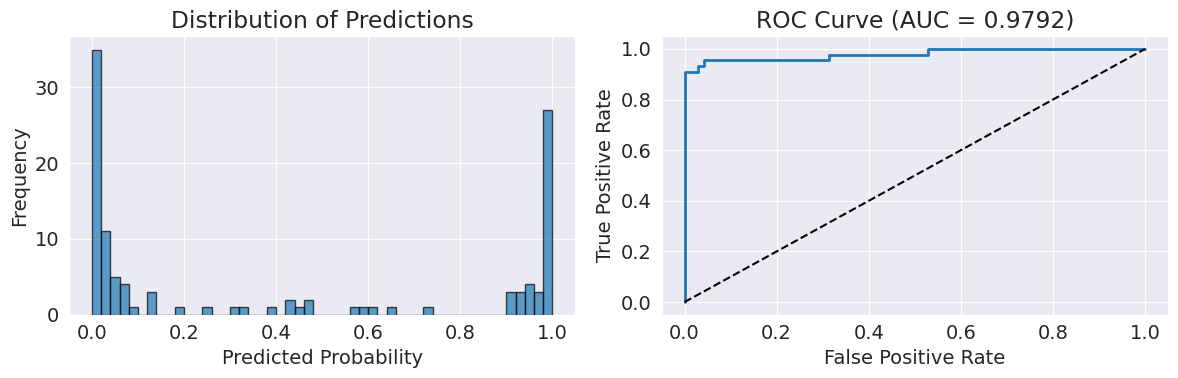

AUC Score: 0.9792
Prediction range: 0.0000 to 1.0000
Mean prediction: 0.4157


In [26]:
# Let's see the prediction distribution to understand the model better
plt.figure(figsize=(12, 4))

# Convert string targets to numeric if needed
if set(val_targets) == {'B', 'M'}:
    val_targets_numeric = np.where(val_targets == 'M', 1, 0)
else:
    val_targets_numeric = val_targets

# Plot 1: Prediction distribution
plt.subplot(1, 2, 1)
plt.hist(val_pred_proba, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions')

# Plot 2: ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(val_targets_numeric, val_pred_proba)
auc_score = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc_score:.4f})')
plt.tight_layout()
plt.show()

# Additional analysis
print(f"AUC Score: {auc_score:.4f}")
print(f"Prediction range: {val_pred_proba.min():.4f} to {val_pred_proba.max():.4f}")
print(f"Mean prediction: {val_pred_proba.mean():.4f}")

### **XGBClassifier Model**

Fitting 5 folds for each of 81 candidates, totalling 405 fits

MODEL: XGBClassifier (Optimized)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}

1. Accuracy (Overall Accuracy): 0.9649
2. Balanced Accuracy: 0.9581
3. ROC AUC Score: 0.9925

4. Classification Report (F1, Precision, Recall):
               precision    recall  f1-score   support

   Benign (B)       0.96      0.99      0.97        71
Malignant (M)       0.98      0.93      0.95        43

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114


5. Confusion Matrix (Numerical):
[[70  1]
 [ 3 40]]

6. Confusion Matrix (Visual):


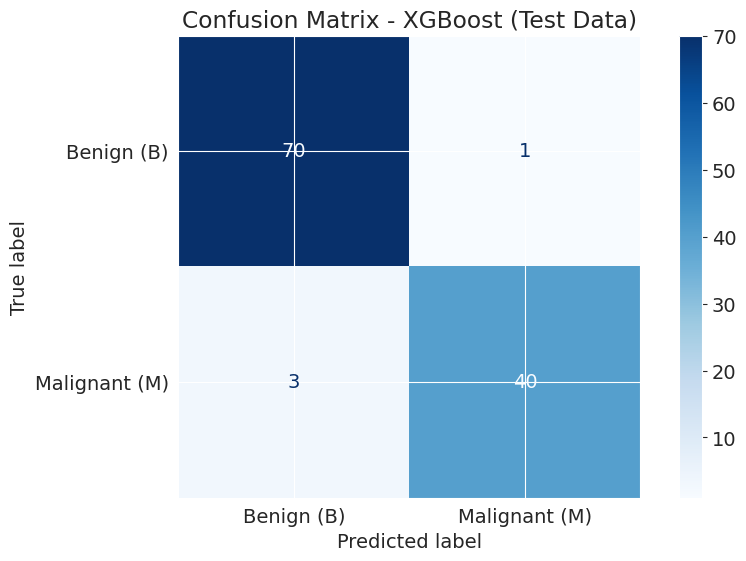

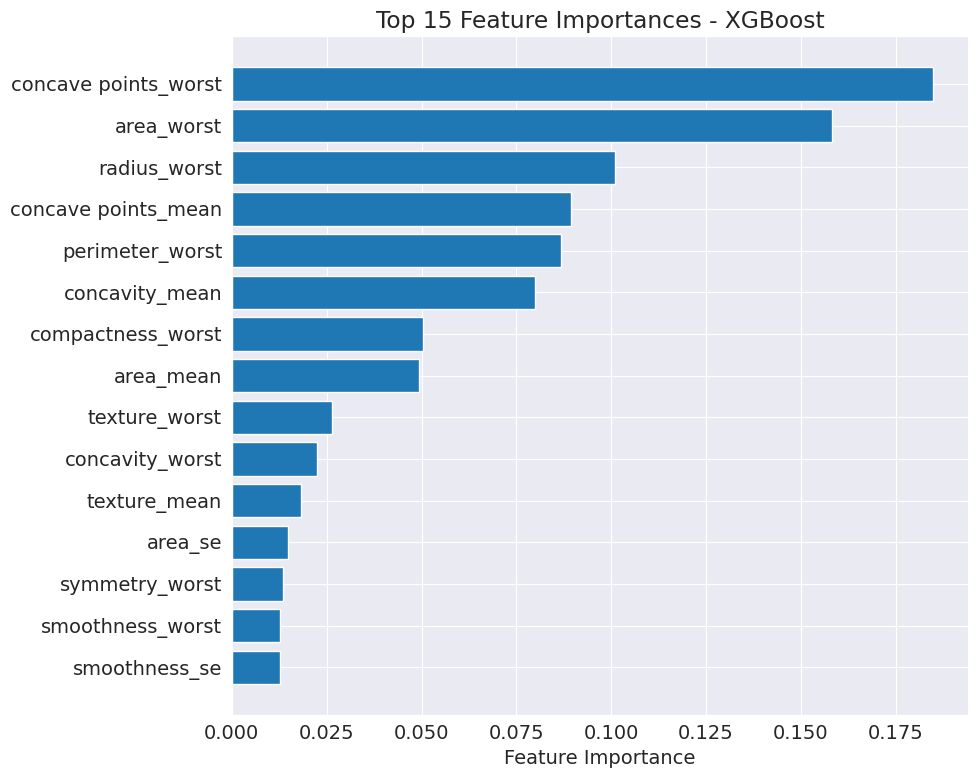

In [27]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,  
    accuracy_score, 
    balanced_accuracy_score, 
    roc_auc_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Convert string labels to numeric
train_targets_numeric = train_targets.map({'B': 0, 'M': 1})
test_targets_numeric = test_targets.map({'B': 0, 'M': 1})

xgb_model = XGBClassifier(
    scale_pos_weight=0.5, 
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5, 
    n_jobs=-1, 
    verbose=1,  # Increased verbosity to see progress
)

grid_search_xgb.fit(X_train, train_targets_numeric)

best_model = grid_search_xgb.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\n" + "="*50)
print(f"MODEL: XGBClassifier (Optimized)")
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print("="*50 + "\n")

print(f"1. Accuracy (Overall Accuracy): {accuracy_score(test_targets_numeric, y_pred):.4f}")
print(f"2. Balanced Accuracy: {balanced_accuracy_score(test_targets_numeric, y_pred):.4f}")
print(f"3. ROC AUC Score: {roc_auc_score(test_targets_numeric, y_pred_proba):.4f}")

print("\n4. Classification Report (F1, Precision, Recall):")
print(classification_report(test_targets_numeric, y_pred, target_names=['Benign (B)', 'Malignant (M)']))

print("\n5. Confusion Matrix (Numerical):")
cm = confusion_matrix(test_targets_numeric, y_pred)
print(cm)

print("\n6. Confusion Matrix (Visual):")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (B)', 'Malignant (M)'])
disp.plot(cmap=plt.cm.Blues, values_format='d') 
plt.title("Confusion Matrix - XGBoost (Test Data)")
plt.show()

# Additional: Feature Importance
plt.figure(figsize=(10, 8))
feature_importance = best_model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1][:15]  # Top 15 features

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

+ Only 4 misclassifications out of 114 test samples

+ 1 False Positive (benign predicted as malignant) - good for minimizing unnecessary procedures

+ 3 False Negatives (malignant predicted as benign) - this is the most critical error type in medical diagnosis

In [28]:
# Get probability predictions instead of class predictions
val_pred_proba = best_model.predict_proba(X_val)[:, 1]  # Probability of class 1

# Calculate ROC-AUC
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(val_targets, val_pred_proba)
print(f"XGBClassifier Model ROC-AUC score: {auc_score:.4f}")

XGBClassifier Model ROC-AUC score: 0.9815


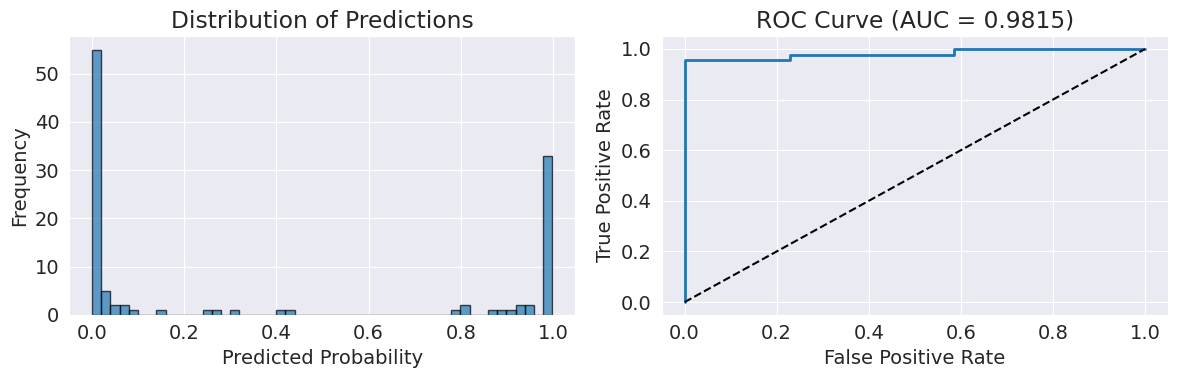

AUC Score: 0.9815
Prediction range: 0.0006 to 0.9981
Mean prediction: 0.3869


In [29]:
# Let's see the prediction distribution to understand the model better
plt.figure(figsize=(12, 4))

# Convert string targets to numeric if needed
if set(val_targets) == {'B', 'M'}:
    val_targets_numeric = np.where(val_targets == 'M', 1, 0)
else:
    val_targets_numeric = val_targets

# Plot 1: Prediction distribution
plt.subplot(1, 2, 1)
plt.hist(val_pred_proba, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions')

# Plot 2: ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(val_targets_numeric, val_pred_proba)
auc_score = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc_score:.4f})')
plt.tight_layout()
plt.show()

# Additional analysis
print(f"AUC Score: {auc_score:.4f}")
print(f"Prediction range: {val_pred_proba.min():.4f} to {val_pred_proba.max():.4f}")
print(f"Mean prediction: {val_pred_proba.mean():.4f}")